In [1]:
print('hello')

hello


In [2]:
import re
import math
from nltk.tokenize import WhitespaceTokenizer
# from nltk.tokenize import WhitespaceTokenizer
import random
import pandas as pd
import matplotlib.pyplot as plt
from langdetect import detect
from collections import Counter
from itertools import permutations
from functools import lru_cache
from typing import List, Tuple, Set, Dict, Callable

In [3]:
tokenizer = WhitespaceTokenizer()
Word = str
cat = ''.join

In [4]:
def tokens(text) -> List[Word]:
    """List all the word tokens (consecutive) in a text. Normalized the text to lower case"""
    return re.findall('[a-z]+', text.lower())

sentence = ' '.join

In [5]:
def sample(words, n = 10) -> str:
    """Sample n random  from a list of words."""
    return [random.choice(words) for _ in range(n)]

In [6]:
#An inheritence class
class Bag(Counter):
    """A child class for bag of words. This will inherit all the properties of the Parent Class"""
    pass

In [7]:
def zifp_plot(bag):
    
    M = max(bag.values()) #The highest frequent value
    X = range(1, len(bag) + 1)

    plt.yscale('log'); plt.xscale('log') # Create a logarithmic x-scale and y-scale
    plt.title('Frequency of n-th most frequent word and 1/n line. ')

    plt.xlabel('Word Index Number'); plt.ylabel('Word Frequency')
    
    plt.plot(X, [M/i for i in X], ':', label = '1/n')

    plt.plot(X, [c for (w, c) in bag.most_common()], '.', label='actual word frequency')
    
    plt.grid(); plt.legend(loc = 1)


In [8]:
DF09190925_CD = pd.read_csv(r'C:\Users\Daraz\Documents\ddda\ChatDetailsDataset\2022_09190925_CD.csv')

In [9]:
DF09190925_CD.head(2)

,Create Date,tenant_name,robot_code,robot_name,from_id,from_name,Session_id,Intention,user_id,Seller id (X-space),...,Feedback Card Response,is_chat_recommend,is_chat_no answer,is_chat_pre/post match,live agent_session_id,Last Query Before Live Agent Session,Live Agent User Query,Live Agent Response,Feedback Type,Unsatisfied Reason
0,2022-09-21 00:00:00,Alime-DRZ-CC-BD,l2Cgc9psxK,BD-Daz-EN,V3EasrtOgs,BD-Daz-EN-HC-App,371e521752f24e77ab722916e0be37cd,route_daraz_others,2101100022513659,7.000094e+11,...,NaN,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-09-21 00:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,zpojXywwrn,BD-Daz-LC-DD-App,3f4f9f488d1143d79ec1ad9296317c7a,route_daraz_others,2101100093534982,7.005219e+11,...,NaN,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
DF09190925_CD.tail(2)

,Create Date,tenant_name,robot_code,robot_name,from_id,from_name,Session_id,Intention,user_id,Seller id (X-space),...,Feedback Card Response,is_chat_recommend,is_chat_no answer,is_chat_pre/post match,live agent_session_id,Last Query Before Live Agent Session,Live Agent User Query,Live Agent Response,Feedback Type,Unsatisfied Reason
99998,2022-09-20 00:00:00,Alime-DRZ-CC-BD,l2Cgc9psxK,BD-Daz-EN,2QpojyCHcD,BD-Daz-EN-DD-App,7e2c119702b441a19bb39590347793be,route_daraz_others,2101100093818184,7.000504e+11,...,NaN,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN
99999,2022-09-20 00:00:00,Alime-DRZ-CC-BD,l2Cgc9psxK,BD-Daz-EN,2QpojyCHcD,BD-Daz-EN-DD-App,7e2c119702b441a19bb39590347793be,NaN,2101100093818184,7.000504e+11,...,NaN,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
DF09190925_CD['Create Date'].value_counts()

2022-09-24 00:00:00    20163
2022-09-19 00:00:00    17312
2022-09-22 00:00:00    13501
2022-09-20 00:00:00    13434
2022-09-23 00:00:00    13080
2022-09-25 00:00:00    11464
2022-09-21 00:00:00    11046
Name: Create Date, dtype: int64

In [12]:
DF09190925_CD.columns

Index(['Create Date', 'tenant_name', 'robot_code', 'robot_name', 'from_id',
       'from_name', 'Session_id', 'Intention', 'user_id',
       'Seller id (X-space)', 'user_nick', 'create_time', 'chat_uuid',
       'Enter Type', 'query', 'Question Type', 'sopname', 'answer_type',
       'SOP_Solution_id', 'SOP_Solution_Name', 'Standard Knowledge Title',
       'Knowledge_id', 'knowledge_cate_1_name', 'knowledge_cate_2_name',
       'knowledge_cate_3_name', 'is_session_unsatisfied',
       'is_session_last_no answer', 'call_agent_by_click_shortcut',
       'is_session_last_recommend no click', 'call_agent_by_intention',
       'is_session_direct_liveagent', 'Contacted live agent on same day',
       'Feedback Card Response', 'is_chat_recommend', 'is_chat_no answer',
       'is_chat_pre/post match', 'live agent_session_id',
       'Last Query Before Live Agent Session', 'Live Agent User Query',
       'Live Agent Response', 'Feedback Type', 'Unsatisfied Reason'],
      dtype='object')

In [14]:
TEXT_C = DF09190925_CD['query'].str.cat(sep = ' ')

In [15]:
TEXT_C =  TEXT_C.lower()

In [20]:
words = set(nltk.corpus.words.words())

In [21]:
sent = "To andimo to the beach with ammico"

In [ ]:
" ".join(w for w in nltk.wordpunct_tokenize(sent))

In [19]:
len(TEXT_C)

2795387

In [13]:
TEXT_C.isalpha()

False

In [20]:
WORDS_C = tokens(TEXT_C)

In [21]:
sentence(sample(WORDS_C))

'order very prematch my product to an prematch my available'

In [22]:
WORDS_C[:20]

['how',
 'can',
 'i',
 'track',
 'my',
 'order',
 'prematch',
 'item',
 'shipped',
 'hoyeche',
 'prematch',
 'need',
 'help',
 'prematch',
 'cancel',
 'order',
 'i',
 'don',
 't',
 'ricved']

In [23]:
BAG_C = Bag(WORDS_C)

In [24]:
BAG_C.most_common(20)

[('prematch', 20918),
 ('order', 19688),
 ('i', 15474),
 ('my', 12661),
 ('need', 7974),
 ('help', 7891),
 ('cancel', 7124),
 ('can', 7062),
 ('to', 6843),
 ('is', 5874),
 ('how', 5863),
 ('track', 5406),
 ('return', 4708),
 ('agent', 4620),
 ('want', 3685),
 ('about', 3522),
 ('customer', 2922),
 ('query', 2913),
 ('refund', 2772),
 ('delivery', 2756)]

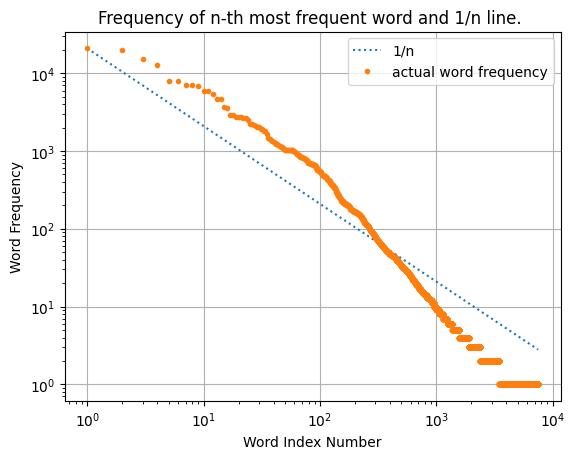

In [26]:
zifp_plot(BAG_C)

In [ ]:
""
TEXT_C

In [32]:
WORD_C_NLTK_BN = " ".join(word for word in tokenizer.tokenize(TEXT_C) if not word.isascii()) #White Space Tokenizer
WORD_C_NLTK_EN = " ".join(word for word in tokenizer.tokenize(TEXT_C) if word.isascii())
# WORDS_C_NLTK = tokenizer.tokenize(TEXT_C) #Using NLTK gives a more accurate tokenized words

In [ ]:
WORD_C_NLTK_BN

In [33]:
WORD_C_NLTK_BN[1:1000]

'র্ডার কিভাবে বাতিল করব আমার সাহায্য লাগবে আমার অর্ডার কিভাবে ট্র্যাক করতে পারবো আমার ডেলিভারি ফেইল্ড দেখাচ্ছে কেন কালেকশন পয়েন্ট কোন সময়ে খোলা থাকবে কাবে অাসবে আমার অর্ডার আসতে দেরি হচ্ছে কেন ভাষা পরিবর্তন করবো কিভাবে? আমি অর্ডার সম্পর্কে জানতে চাই আমি একটা এসি ইন্সটলমেন্টে নেওয়ার জন্য ফরম পূরণ করেছিলাম সেটা কি ইন্সটলমেন্টে হয়েছে নাকি একটু দেখবেন । অর্ডার বাতিল আমি অর্ডার সম্পর্কে জানতে চাই আমি অর্ডার সম্পর্কে জানতে চাই অর্ডার বাতিল আমার সাহায্য লাগবে আমি আমার ক্যান্সেল করা অর্ডার গুলো আবার আমি কিনতে চাই বিকাশ দিয়ে পেমেন্ট করতে পারছিনা কেন? আরো সাহায্য প্রয়োজন আমার অর্ডার কিভাবে ট্র্যাক করতে পারবো টিসাট নিমুনা আমার সাহায্য লাগবে অর্ডার বাছাইকরণ কিভাবে ব্যবহার করব? চ্যাটবট গাইড আমার সাহায্য লাগবে আমার সাহায্য লাগবে শিপিং এবং ডেলিভেরি সক্রান্ত প্রশ্ন অর্ডার ট্র্যাক রিটার্ন নিবেন কয়দিনের ভিতরে আর অর্ডার গুলো আমি ক্যানসেল করতেও পারছি না আমার সাহায্য লাগবে চ্যাটবট গাইড অর্ডার ট্র্যাক আমার অর্ডার কিভাবে ট্র্যাক করতে পারবো? ২১ তারিখে আসবে আমি কি পণ্যটি রিটার্ন করতে পারবো আমি কি পণ্যটি রি

In [34]:
WORD_C_NLTK_EN[1:1000]

'ow can i track my order prematch - item shipped hoyeche prematch - need help prematch - cancel order i don\'t ricved that ..... ? where is my order prematch - track order prematch - need help prematch - track order need more help where is my order how can i track my order prematch - cancel order pant ta chira ami ki amar order cancel korte parbo prematch - need help jr jjf registration offer nai 0 live agent prematch - need help why can\'t i cancel my order? amar order ashte deri hocche keno prematch - track order prematch - cancel my order please help me {"url":"https://alime-customer-upload-lazada.oss-ap-southeast-1.aliyuncs.com/customer-upload/1663613301641_65be703239c948a7beb370504e760d4a.jpg"} prematch - return why do i see a failed delivery attempt ami je mal ta order dici mal ta amr dorker taratari,,kintu akta vul hoice ami vul kore akta number vul dici gent prematch - need help 632192387430763 need more help prematch - prematch - prematch - need help where is my order payment 

In [18]:
WORDS_C_NLTK[1:30]

['can',
 'i',
 'track',
 'my',
 'order',
 'অর্ডার',
 'কিভাবে',
 'বাতিল',
 'করব',
 'prematch',
 '-',
 'আমার',
 'সাহায্য',
 'লাগবে',
 'আমার',
 'অর্ডার',
 'কিভাবে',
 'ট্র্যাক',
 'করতে',
 'পারবো',
 'item',
 'shipped',
 'hoyeche',
 'prematch',
 '-',
 'need',
 'help',
 'prematch',
 '-']

In [17]:
len(WORDS_C_NLTK)

462665

In [16]:
WORDS_C_POS_TAG = nltk.pos_tag(WORDS_C_NLTK) #parts of speech tags

In [17]:
WORDS_NOUNS = [word for word, pos in WORDS_C_POS_TAG if(pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
WORDS_VERBS = [word for word, pos in WORDS_C_POS_TAG if(pos == 'VB' or pos == 'VBD' or pos == 'VBG' or pos == 'VBN' or pos == 'VBP', pos == 'VBZ')]

In [32]:
WORDS_NOUNS[1:10]

['অর্ডার',
 'কিভাবে',
 'বাতিল',
 'করব',
 'prematch',
 'আমার',
 'লাগবে',
 'আমার',
 'অর্ডার']

In [34]:
WORDS_NOUNS.index(' ')

ValueError: ' ' is not in list

In [27]:
len(WORDS_VERBS)

495714

In [36]:
WORDS_NOUNS_EN = []
WORDS_NOUNS_BN = [] 

for word in WORDS_NOUNS:

    try:

        if detect(word) == 'en':

            WORDS_NOUNS_EN.append(word)

        else:

            pass 

    except:

        # print('Exception')
        
        pass

In [20]:
[word for word in WORDS_NOUNS if(detect(word) == 'en')]

LangDetectException: No features in text.

In [19]:
WORDS_NOUNS_EN = [word for word in WORDS_NOUNS if(detect(word) == 'en')]
# WORDS_NOUNS_BN = [word for word in WORDS_NOUNS if(detect(word) == 'bn')]


LangDetectException: No features in text.

In [50]:
sentence(sample(WORDS_NOUNS))

'অর্ডার আমার ডেলিভারি i i chay prematch কি need প্রশ্ন'

In [51]:
BAG_NOUNS = Bag(WORDS_NOUNS)

In [52]:
BAG_VERBS = Bag(WORDS_VERBS)

In [28]:
len(tokens)

495747

In [32]:
BAG_C = Bag(WORDS_C_NLTK)

In [34]:
BAG_C.most_common(30)

[('-', 20936),
 ('Prematch', 20918),
 ('?', 14164),
 ('I', 13974),
 ('order', 13665),
 ('আমার', 12442),
 ('my', 11125),
 ('অর্ডার', 11090),
 ('help', 7769),
 ('কিভাবে', 7304),
 ('to', 6820),
 ('Need', 6316),
 ('Order', 6010),
 ('How', 5752),
 ('করতে', 5643),
 ('ট্র্যাক', 5116),
 ('is', 5108),
 ('পারবো', 4940),
 ('আমি', 4491),
 ('সাহায্য', 4456),
 ('.', 4173),
 ('cancel', 3942),
 ('লাগবে', 3784),
 ('Can', 3650),
 ('want', 3622),
 ('about', 3522),
 ('রিটার্ন', 3456),
 ('বাতিল', 3355),
 ('agent', 3229),
 ('Cancel', 3181)]

In [ ]:
TEXT = open('big.txt').read()

In [ ]:
TEXT[:200]

In [ ]:
len(TEXT)

In [21]:
WORDS_C[50:60]

['need',
 'help',
 'jrjjfregistration',
 'offer',
 'nai',
 'live',
 'agentprematch',
 'need',
 'help',
 'why']

In [37]:
tokens('This is a tet')

['this', 'is', 'a', 'tet']

In [43]:
BAG_C.most_common(20) #Most common words

[('i', 12753),
 ('my', 11901),
 ('order', 10489),
 ('prematch', 9763),
 ('need', 7016),
 ('cancel', 6950),
 ('to', 6820),
 ('is', 5452),
 ('track', 5401),
 ('can', 5112),
 ('want', 3648),
 ('about', 3522),
 ('return', 3373),
 ('how', 2761),
 ('related', 2678),
 ('an', 2646),
 ('orderprematch', 2562),
 ('customer', 2528),
 ('delivery', 2499),
 ('help', 2240)]

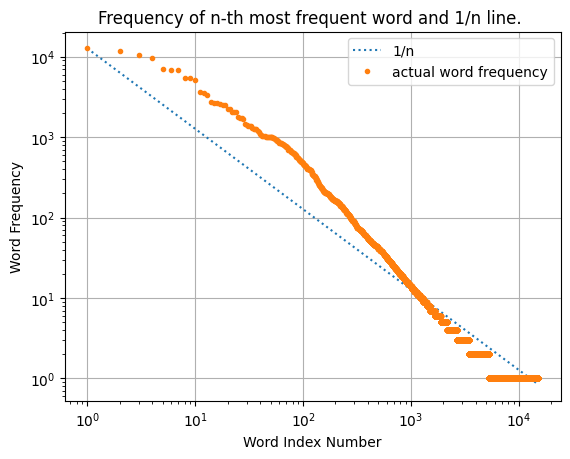

In [46]:
zifp_plot(BAG_C)

In [ ]:
sentence(tokens('This is: "A test". 😋'))

In [ ]:
WORDS = tokens(TEXT)
len(WORDS)

In [ ]:
sentence(WORDS[:10])

In [ ]:
sentence(sample(WORDS)) #Sampling 10 words

In [ ]:
WORDS.count('dog')

In [ ]:
class Bag(Counter):
    """A child class for bag of words. This will inherit all the properties of the Parent Class"""
    pass


In [ ]:
Bag(tokens('Is this a test? It is a test? You may never know if it!'))

In [ ]:
BAG = Bag(WORDS)

In [ ]:
BAG.most_common(10)

In [ ]:
M = max(BAG.values())

In [ ]:
X = range(1, len(BAG) + 1)

In [ ]:
X

In [ ]:
[c for (w, c) in BAG.most_common()]

In [ ]:
[M for i in X]

the nth most frequent word appears with a frequency of roughly 1/n of the most frequent word. 

Zipf's Law

In [ ]:
zifp_plot(BAG)

Spell Correction

In [ ]:
{'train'}.intersection(BAG) #Internsection of words

In [ ]:
#Returns a set of words that are knowns

def known(words) -> Set[Word]:
    return words.intersection()

insertions: 

In [ ]:
def splits(word) -> List[Tuple[str, str]]:
    """Return a list of all possible (first, rest) pairs """
    return[(word[:i], word[i:]) for i in range(len(word) + 1)]

In [ ]:
a = 'abcdefghijklmnopqrstuvwxyz'

In [ ]:
c = 'e'

In [ ]:
a = 'w'
b = 'ird'

In [ ]:
a + c + b

In [ ]:
a + c + b[1:]


In [ ]:
a + b

In [ ]:
a + b[1] + b[0] + b[2:]

segmentation of char

In [ ]:
print(a[:4])
print(a[4:])

In [ ]:
a+a[1]

In [ ]:
splits('abcdefghijklmnopqrstuvwxyz')

In [ ]:
def edits1(word) -> Set[str]:
    """Returns all strings that are one edit away from this word"""
    edits = set() #set
    for a, b in splits(word):
        if b: edits.add(a + b[1:])

In [ ]:
def correct(word) -> Word:
    """Best spelling correction"""
    candidates = (known())

In [ ]:
edits = set()

In [ ]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'

def edits1(word) -> Set[str]:
    """Return all strings that one edit away from this word."""
    edits = set()
    for a, b in splits(word):
        if b: edits.add(a+b[1:]) #deletion of chars from mispelled words
        if len(b) >= 2: edits.add(a+b[1]+b[0]+b[2:]) # transposition
        for c in alphabet:
            edits.add(a+c+b[1:]) #replacement
            edits.add(a+c+b) #insertion
    
    return edits
    return set(deletes + transposes + replaces + inserts)

def edits2(word) -> Set[str]:
    """Return all strings that are two edits away from this word."""
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}




In [ ]:
edits1('agent')

In [ ]:
edits.add(a + b[1] + b[0] + b[2:])